In [175]:
pip install hdbscan

Note: you may need to restart the kernel to use updated packages.


In [176]:
import warnings

warnings.filterwarnings('ignore')

In [177]:
import pandas as pd

In [178]:
df = pd.read_csv("../data/odwp/odwp/odwp09ew/ODWP09EW_MSOA.csv")

In [179]:
df.head()

,Middle layer Super Output Areas code,Middle layer Super Output Areas label,MSOA of workplace code,MSOA of workplace label,Approximated social grade (5 categories) code,Approximated social grade (5 categories) label,Place of work indicator (4 categories) code,Place of work indicator (4 categories) label,Count
0,E02000001,City of London 001,-8,Does not apply,-8,Does not apply,-8,Does not apply,1067
1,E02000001,City of London 001,-8,Does not apply,1,AB Higher and intermediate managerial/administ...,-8,Does not apply,418
2,E02000001,City of London 001,-8,Does not apply,2,"C1 Supervisory, clerical and junior managerial...",-8,Does not apply,669
3,E02000001,City of London 001,-8,Does not apply,3,C2 Skilled manual occupations,-8,Does not apply,81
4,E02000001,City of London 001,-8,Does not apply,4,DE Semi-skilled and unskilled manual occupatio...,-8,Does not apply,418


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3760466 entries, 0 to 3760465
Data columns (total 9 columns):
 #   Column                                          Dtype 
---  ------                                          ----- 
 0   Middle layer Super Output Areas code            object
 1   Middle layer Super Output Areas label           object
 2   MSOA of workplace code                          object
 3   MSOA of workplace label                         object
 4   Approximated social grade (5 categories) code   int64 
 5   Approximated social grade (5 categories) label  object
 6   Place of work indicator (4 categories) code     int64 
 7   Place of work indicator (4 categories) label    object
 8   Count                                           int64 
dtypes: int64(3), object(6)
memory usage: 258.2+ MB


In [181]:
unique_names = df['Approximated social grade (5 categories) label'].unique()

print("Unique Names:", unique_names)

Unique Names: ['Does not apply'
 'AB Higher and intermediate managerial/administrative/professional occupations'
 'C1 Supervisory, clerical and junior managerial/administrative/professional occupations'
 'C2 Skilled manual occupations'
 'DE Semi-skilled and unskilled manual occupations; unemployed and lowest grade occupations']


In [182]:
df = df[df['Middle layer Super Output Areas code'].str.startswith('E')].reset_index(drop=True)
df = df[df['MSOA of workplace code'].str.startswith('E')].reset_index(drop=True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512446 entries, 0 to 3512445
Data columns (total 9 columns):
 #   Column                                          Dtype 
---  ------                                          ----- 
 0   Middle layer Super Output Areas code            object
 1   Middle layer Super Output Areas label           object
 2   MSOA of workplace code                          object
 3   MSOA of workplace label                         object
 4   Approximated social grade (5 categories) code   int64 
 5   Approximated social grade (5 categories) label  object
 6   Place of work indicator (4 categories) code     int64 
 7   Place of work indicator (4 categories) label    object
 8   Count                                           int64 
dtypes: int64(3), object(6)
memory usage: 241.2+ MB


In [184]:
import geopandas as gpd

gdf = gpd.read_file("../data/london_msoa.zip", driver="ESRI Shapefile")

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MSOA11CD   983 non-null    object  
 1   MSOA11NM   983 non-null    object  
 2   LAD11CD    983 non-null    object  
 3   LAD11NM    983 non-null    object  
 4   RGN11CD    983 non-null    object  
 5   RGN11NM    983 non-null    object  
 6   USUALRES   983 non-null    int64   
 7   HHOLDRES   983 non-null    int64   
 8   COMESTRES  983 non-null    int64   
 9   POPDEN     983 non-null    float64 
 10  HHOLDS     983 non-null    int64   
 11  AVHHOLDSZ  983 non-null    float64 
 12  geometry   983 non-null    geometry
dtypes: float64(2), geometry(1), int64(4), object(6)
memory usage: 100.0+ KB


,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


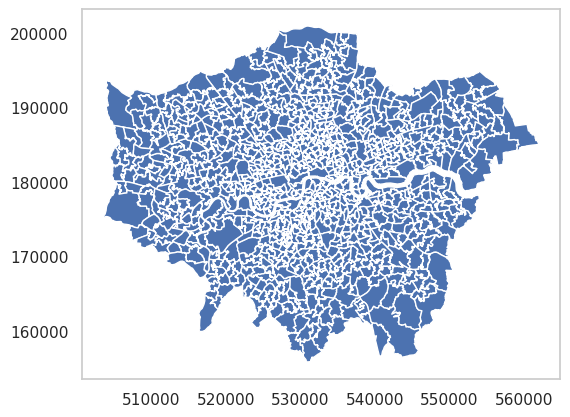

In [185]:
gdf.plot()
plt.grid(False)
gdf.head()

In [186]:
gdf = gdf[['MSOA11CD', 'geometry']]

In [187]:
df = df[df['Middle layer Super Output Areas code'].isin(gdf['MSOA11CD'])].reset_index(drop=True)
df = df[df['MSOA of workplace code'].isin(gdf['MSOA11CD'])].reset_index(drop=True)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565668 entries, 0 to 565667
Data columns (total 9 columns):
 #   Column                                          Non-Null Count   Dtype 
---  ------                                          --------------   ----- 
 0   Middle layer Super Output Areas code            565668 non-null  object
 1   Middle layer Super Output Areas label           565668 non-null  object
 2   MSOA of workplace code                          565668 non-null  object
 3   MSOA of workplace label                         565668 non-null  object
 4   Approximated social grade (5 categories) code   565668 non-null  int64 
 5   Approximated social grade (5 categories) label  565668 non-null  object
 6   Place of work indicator (4 categories) code     565668 non-null  int64 
 7   Place of work indicator (4 categories) label    565668 non-null  object
 8   Count                                           565668 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 3

In [189]:
df = df[['Middle layer Super Output Areas code', 'Middle layer Super Output Areas label', 
         'MSOA of workplace code', 'MSOA of workplace label', 
         'Approximated social grade (5 categories) code', 'Approximated social grade (5 categories) label',
         'Count']]
df.rename(columns={'Middle layer Super Output Areas code': 'origin', 'Middle layer Super Output Areas label': 'origin label',
                   'MSOA of workplace code': 'destination', 'MSOA of workplace label': 'destination label', 
                   'Approximated social grade (5 categories) code': 'social grade', 
                   'Approximated social grade (5 categories) label': 'social grade label',
                   'Count': 'flow'}, inplace=True)

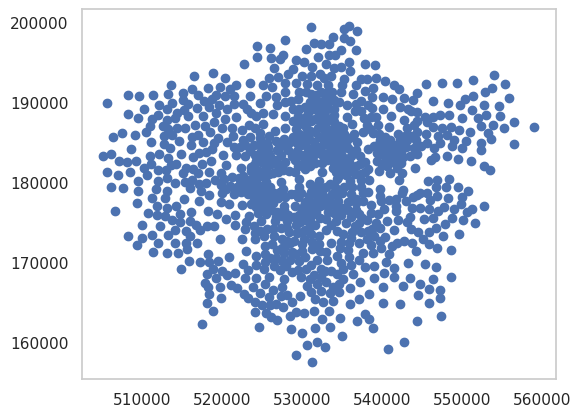

In [191]:
centroid = gdf.geometry.centroid
gdf['centroid'] = centroid
gdf = gdf.drop(columns=['geometry'])
gdf = gdf[['MSOA11CD', 'centroid']]
gdf.rename(columns={'centroid': 'geometry'}, inplace=True)
gdf.plot()
plt.grid(False)

In [192]:
gdf['x'] = gdf['geometry'].x
gdf['y'] = gdf['geometry'].y
df_coords = gdf.drop(columns=['geometry'])
merged_df = df.merge(df_coords, how='left', left_on='origin', right_on='MSOA11CD')
merged_df.rename(columns={'x': 'ox', 'y': 'oy'}, inplace=True)
df_od_flow = merged_df.merge(df_coords, how='left', left_on='destination', right_on='MSOA11CD')
df_od_flow.rename(columns={'x': 'dx', 'y': 'dy'}, inplace=True)
df_od_flow = df_od_flow[['origin', 'origin label', 'ox', 'oy', 'destination', 'destination label', 'dx', 'dy', 'social grade', 'social grade label', 'flow']]
df_od_flow.head()
df_od_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565668 entries, 0 to 565667
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   origin              565668 non-null  object 
 1   origin label        565668 non-null  object 
 2   ox                  565668 non-null  float64
 3   oy                  565668 non-null  float64
 4   destination         565668 non-null  object 
 5   destination label   565668 non-null  object 
 6   dx                  565668 non-null  float64
 7   dy                  565668 non-null  float64
 8   social grade        565668 non-null  int64  
 9   social grade label  565668 non-null  object 
 10  flow                565668 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 47.5+ MB


In [193]:
from shapely.geometry import LineString
df_od_flow['geometry'] = df_od_flow.apply(lambda r:LineString([[r['ox'],r['oy']],[r['dx'],r['dy']]]),axis = 1)
df_od_flow = gpd.GeoDataFrame(df_od_flow)
df_od_flow.head()

,origin,origin label,ox,oy,destination,destination label,dx,dy,social grade,social grade label,flow,geometry
0,E02000001,City of London 001,532482.703977,181269.310018,E02000001,City of London 001,532482.703977,181269.310018,-8,Does not apply,291,"LINESTRING (532482.704 181269.310, 532482.704 ..."
1,E02000001,City of London 001,532482.703977,181269.310018,E02000001,City of London 001,532482.703977,181269.310018,-8,Does not apply,26,"LINESTRING (532482.704 181269.310, 532482.704 ..."
2,E02000001,City of London 001,532482.703977,181269.310018,E02000001,City of London 001,532482.703977,181269.310018,1,AB Higher and intermediate managerial/administ...,2378,"LINESTRING (532482.704 181269.310, 532482.704 ..."
3,E02000001,City of London 001,532482.703977,181269.310018,E02000001,City of London 001,532482.703977,181269.310018,1,AB Higher and intermediate managerial/administ...,216,"LINESTRING (532482.704 181269.310, 532482.704 ..."
4,E02000001,City of London 001,532482.703977,181269.310018,E02000001,City of London 001,532482.703977,181269.310018,2,"C1 Supervisory, clerical and junior managerial...",991,"LINESTRING (532482.704 181269.310, 532482.704 ..."


In [194]:
flow_range = df_od_flow['flow'].min(), df_od_flow['flow'].max()

print(f"The flow range is: {flow_range}")

The flow range is: (1, 3566)


In [240]:
df_od_flow = df_od_flow[df_od_flow['social grade'] != -8]
df_od_flow = df_od_flow[df_od_flow['origin'] != df_od_flow['destination']]
df_od_flow = df_od_flow.reset_index(drop=True)
df_od_flow.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 498452 entries, 0 to 498451
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   origin              498452 non-null  object  
 1   origin label        498452 non-null  object  
 2   ox                  498452 non-null  float64 
 3   oy                  498452 non-null  float64 
 4   destination         498452 non-null  object  
 5   destination label   498452 non-null  object  
 6   dx                  498452 non-null  float64 
 7   dy                  498452 non-null  float64 
 8   social grade        498452 non-null  int64   
 9   social grade label  498452 non-null  object  
 10  flow                498452 non-null  int64   
 11  geometry            498452 non-null  geometry
dtypes: float64(4), geometry(1), int64(2), object(5)
memory usage: 45.6+ MB


In [241]:
df_od_flow_sg_1 = df_od_flow[df_od_flow['social grade'] == 1]
df_od_flow_sg_2 = df_od_flow[df_od_flow['social grade'] == 2]
df_od_flow_sg_3 = df_od_flow[df_od_flow['social grade'] == 3]
df_od_flow_sg_4 = df_od_flow[df_od_flow['social grade'] == 4]

In [242]:
df_od_flow_sg_1_sorted = df_od_flow_sg_1.sort_values(by='flow', ascending=False)
df_od_flow_sg_2_sorted = df_od_flow_sg_2.sort_values(by='flow', ascending=False)
df_od_flow_sg_3_sorted = df_od_flow_sg_3.sort_values(by='flow', ascending=False)
df_od_flow_sg_4_sorted = df_od_flow_sg_4.sort_values(by='flow', ascending=False)

In [243]:
df_od_flow_sg_1_sorted_1000 = df_od_flow_sg_1_sorted.head(100)
df_od_flow_sg_2_sorted_1000 = df_od_flow_sg_2_sorted.head(100)
df_od_flow_sg_3_sorted_1000 = df_od_flow_sg_3_sorted.head(100)
df_od_flow_sg_4_sorted_1000 = df_od_flow_sg_4_sorted.head(100)

In [244]:
df_od_flow_sg_1_sorted_1000 = df_od_flow_sg_1_sorted_1000.reset_index(drop=True)
df_od_flow_sg_2_sorted_1000 = df_od_flow_sg_2_sorted_1000.reset_index(drop=True)
df_od_flow_sg_3_sorted_1000 = df_od_flow_sg_3_sorted_1000.reset_index(drop=True)
df_od_flow_sg_4_sorted_1000 = df_od_flow_sg_4_sorted_1000.reset_index(drop=True)

In [245]:
min_value = df_od_flow_sg_1_sorted_1000['flow'].min()
max_value = df_od_flow_sg_1_sorted_1000['flow'].max()

df_od_flow_sg_1_sorted_1000['flow_normalize'] = (df_od_flow_sg_1_sorted_1000['flow'] - min_value) / (max_value - min_value)

min_value = df_od_flow_sg_2_sorted_1000['flow'].min()
max_value = df_od_flow_sg_2_sorted_1000['flow'].max()

df_od_flow_sg_2_sorted_1000['flow_normalize'] = (df_od_flow_sg_2_sorted_1000['flow'] - min_value) / (max_value - min_value)

min_value = df_od_flow_sg_3_sorted_1000['flow'].min()
max_value = df_od_flow_sg_3_sorted_1000['flow'].max()

df_od_flow_sg_3_sorted_1000['flow_normalize'] = (df_od_flow_sg_3_sorted_1000['flow'] - min_value) / (max_value - min_value)

min_value = df_od_flow_sg_4_sorted_1000['flow'].min()
max_value = df_od_flow_sg_4_sorted_1000['flow'].max()

df_od_flow_sg_4_sorted_1000['flow_normalize'] = (df_od_flow_sg_4_sorted_1000['flow'] - min_value) / (max_value - min_value)

<Axes: >

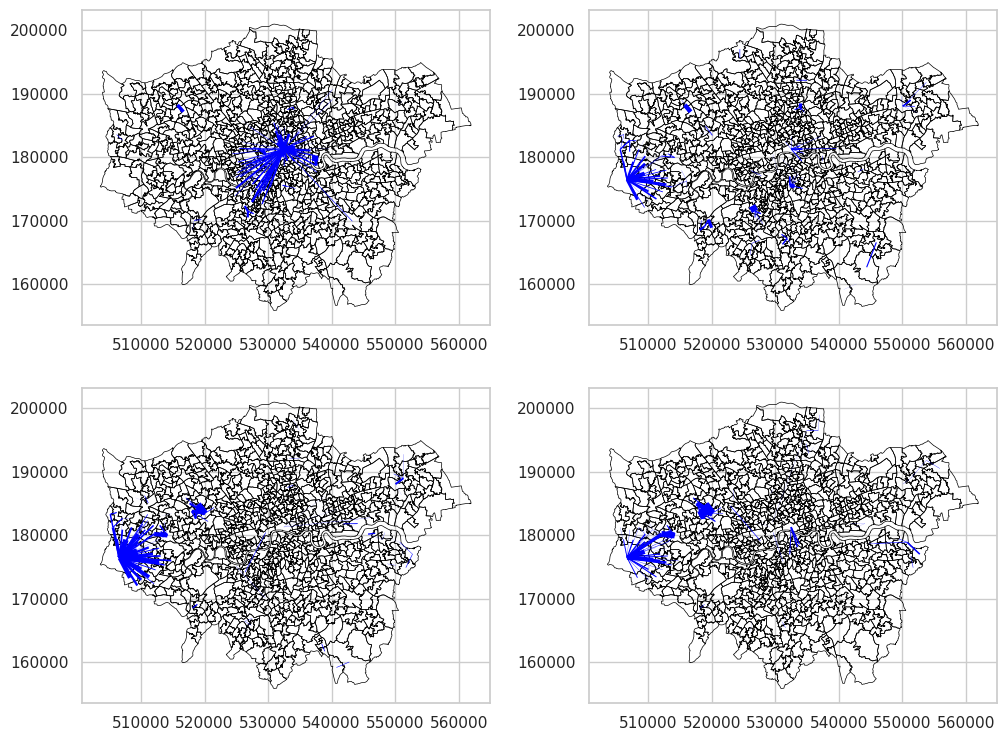

In [278]:
London_msoa = gpd.read_file("../data/london_msoa.zip", driver="ESRI Shapefile")

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

#gdf.plot(color='black', markersize=1, ax=axes[0, 0])
df_od_flow_sg_1_sorted_1000.plot(ax=axes[0, 0], linewidth=df_od_flow_sg_1_sorted_1000['flow_normalize'] * 5, color='blue')
London_msoa.plot(ax=axes[0, 0], edgecolor='black', facecolor='none', linewidth=0.5)

#gdf.plot(color='black', markersize=1, ax=axes[0, 1])
df_od_flow_sg_2_sorted_1000.plot(ax=axes[0, 1], linewidth=df_od_flow_sg_2_sorted_1000['flow_normalize'] * 5, color='blue')
London_msoa.plot(ax=axes[0, 1], edgecolor='black', facecolor='none', linewidth=0.5)

#gdf.plot(color='black', markersize=1, ax=axes[1, 0])
df_od_flow_sg_3_sorted_1000.plot(ax=axes[1, 0], linewidth=df_od_flow_sg_3_sorted_1000['flow_normalize'] * 5, color='blue')
London_msoa.plot(ax=axes[1, 0], edgecolor='black', facecolor='none', linewidth=0.5)

#gdf.plot(color='black', markersize=1, ax=axes[1, 1])
df_od_flow_sg_4_sorted_1000.plot(ax=axes[1, 1], linewidth=df_od_flow_sg_4_sorted_1000['flow_normalize'] * 5, color='blue')
London_msoa.plot(ax=axes[1, 1], edgecolor='black', facecolor='none', linewidth=0.5)

In [263]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

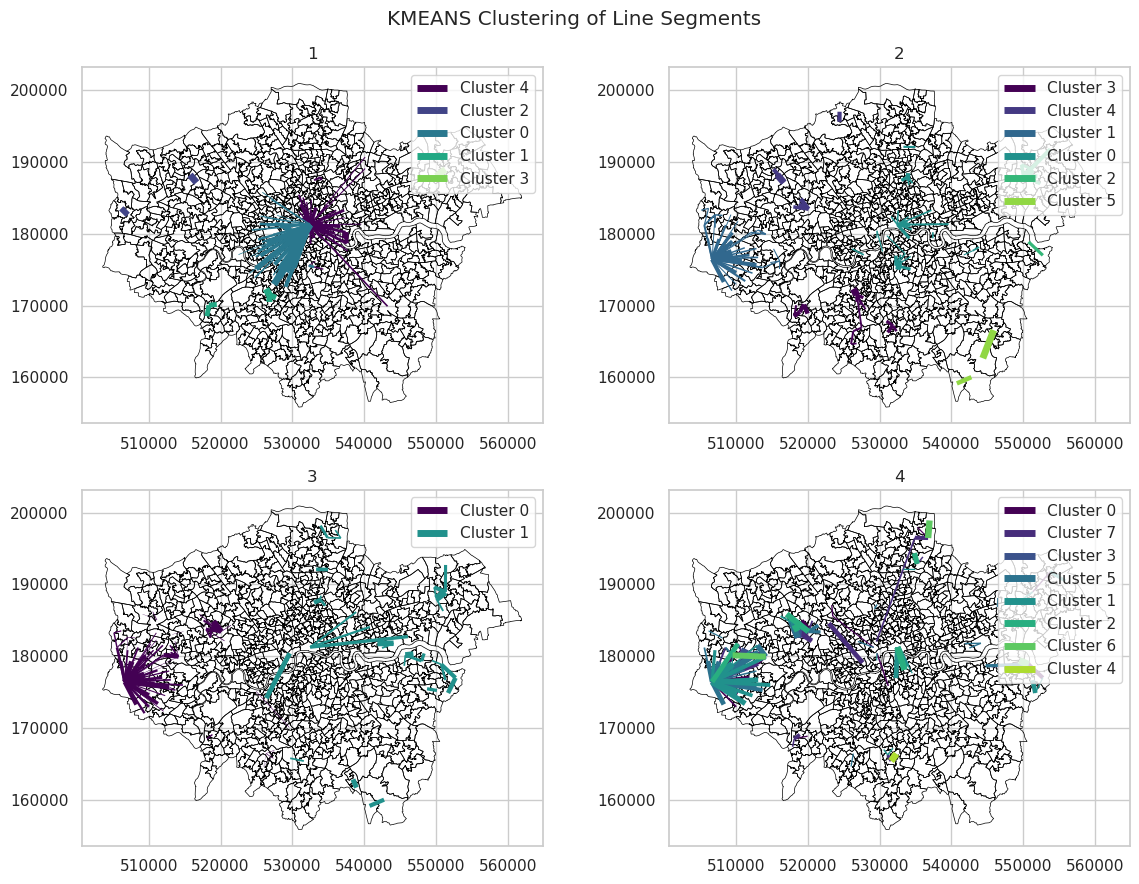

In [321]:
# 使用 StandardScaler 进行特征缩放
# scaler = StandardScaler()
# features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

features_1 = df_od_flow_sg_1_sorted_1000[['ox', 'oy', 'dx', 'dy']]

# 使用 KMEANS 进行聚类
kmeans = KMeans(n_clusters=5, random_state=42)
df_od_flow_sg_1_sorted_1000['KMEANS_cluster'] = kmeans.fit_predict(features_1)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.viridis(i / len(df_od_flow_sg_1_sorted_1000['KMEANS_cluster'].unique())) for i, label in enumerate(df_od_flow_sg_1_sorted_1000['KMEANS_cluster'].unique())}

London_msoa.plot(ax=axes[0, 0], edgecolor='black', facecolor='none', linewidth=0.5)

# 根据簇标签绘制不同颜色的线条
for label in df_od_flow_sg_1_sorted_1000['KMEANS_cluster'].unique():
    subset = df_od_flow_sg_1_sorted_1000[df_od_flow_sg_1_sorted_1000['KMEANS_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=axes[0, 0], color=color, linewidth=df_od_flow_sg_3_sorted_1000['flow_normalize'] * 5, label=f'Cluster {label}')

# 添加图例
axes[0, 0].legend()
axes[0, 0].set_title('1')


features_2 = df_od_flow_sg_2_sorted_1000[['ox', 'oy', 'dx', 'dy']]

# 使用 KMEANS 进行聚类
kmeans = KMeans(n_clusters=6, random_state=42)
df_od_flow_sg_2_sorted_1000['KMEANS_cluster'] = kmeans.fit_predict(features_2)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.viridis(i / len(df_od_flow_sg_2_sorted_1000['KMEANS_cluster'].unique())) for i, label in enumerate(df_od_flow_sg_2_sorted_1000['KMEANS_cluster'].unique())}

London_msoa.plot(ax=axes[0, 1], edgecolor='black', facecolor='none', linewidth=0.5)

# 根据簇标签绘制不同颜色的线条
for label in df_od_flow_sg_2_sorted_1000['KMEANS_cluster'].unique():
    subset = df_od_flow_sg_2_sorted_1000[df_od_flow_sg_2_sorted_1000['KMEANS_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=axes[0, 1], color=color, linewidth=df_od_flow_sg_2_sorted_1000['flow_normalize'] * 5, label=f'Cluster {label}')

# 添加图例
axes[0, 1].legend()
axes[0, 1].set_title('2')

features_3 = df_od_flow_sg_3_sorted_1000[['ox', 'oy', 'dx', 'dy']]

# 使用 KMEANS 进行聚类
kmeans = KMeans(n_clusters=2, random_state=42)
df_od_flow_sg_3_sorted_1000['KMEANS_cluster'] = kmeans.fit_predict(features_3)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.viridis(i / len(df_od_flow_sg_3_sorted_1000['KMEANS_cluster'].unique())) for i, label in enumerate(df_od_flow_sg_3_sorted_1000['KMEANS_cluster'].unique())}

London_msoa.plot(ax=axes[1, 0], edgecolor='black', facecolor='none', linewidth=0.5)

# 根据簇标签绘制不同颜色的线条
for label in df_od_flow_sg_3_sorted_1000['KMEANS_cluster'].unique():
    subset = df_od_flow_sg_3_sorted_1000[df_od_flow_sg_3_sorted_1000['KMEANS_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=axes[1, 0], color=color, linewidth=df_od_flow_sg_3_sorted_1000['flow_normalize'] * 5, label=f'Cluster {label}')

# 添加图例
axes[1, 0].legend()
axes[1, 0].set_title('3')

features_4 = df_od_flow_sg_4_sorted_1000[['ox', 'oy', 'dx', 'dy']]

# 使用 KMEANS 进行聚类
kmeans = KMeans(n_clusters=8, random_state=42)
df_od_flow_sg_4_sorted_1000['KMEANS_cluster'] = kmeans.fit_predict(features)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.viridis(i / len(df_od_flow_sg_4_sorted_1000['KMEANS_cluster'].unique())) for i, label in enumerate(df_od_flow_sg_4_sorted_1000['KMEANS_cluster'].unique())}

London_msoa.plot(ax=axes[1, 1], edgecolor='black', facecolor='none', linewidth=0.5)

# 根据簇标签绘制不同颜色的线条
for label in df_od_flow_sg_4_sorted_1000['KMEANS_cluster'].unique():
    subset = df_od_flow_sg_4_sorted_1000[df_od_flow_sg_4_sorted_1000['KMEANS_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=axes[1, 1], color=color, linewidth=df_od_flow_sg_4_sorted_1000['flow_normalize'] * 5, label=f'Cluster {label}')

# 添加图例
axes[1, 1].legend()
axes[1, 1].set_title('4')

fig.suptitle('KMEANS Clustering of Line Segments')

plt.tight_layout()

plt.show()

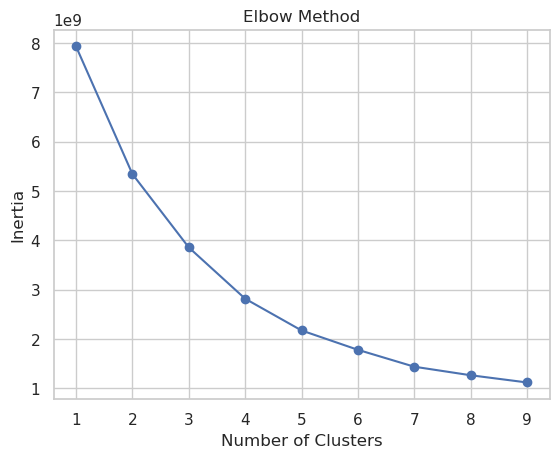

In [308]:
# 肘部法则
inertia_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_1)
    inertia_values.append(kmeans.inertia_)

# 绘制肘部法则图
plt.plot(range(1, 10), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

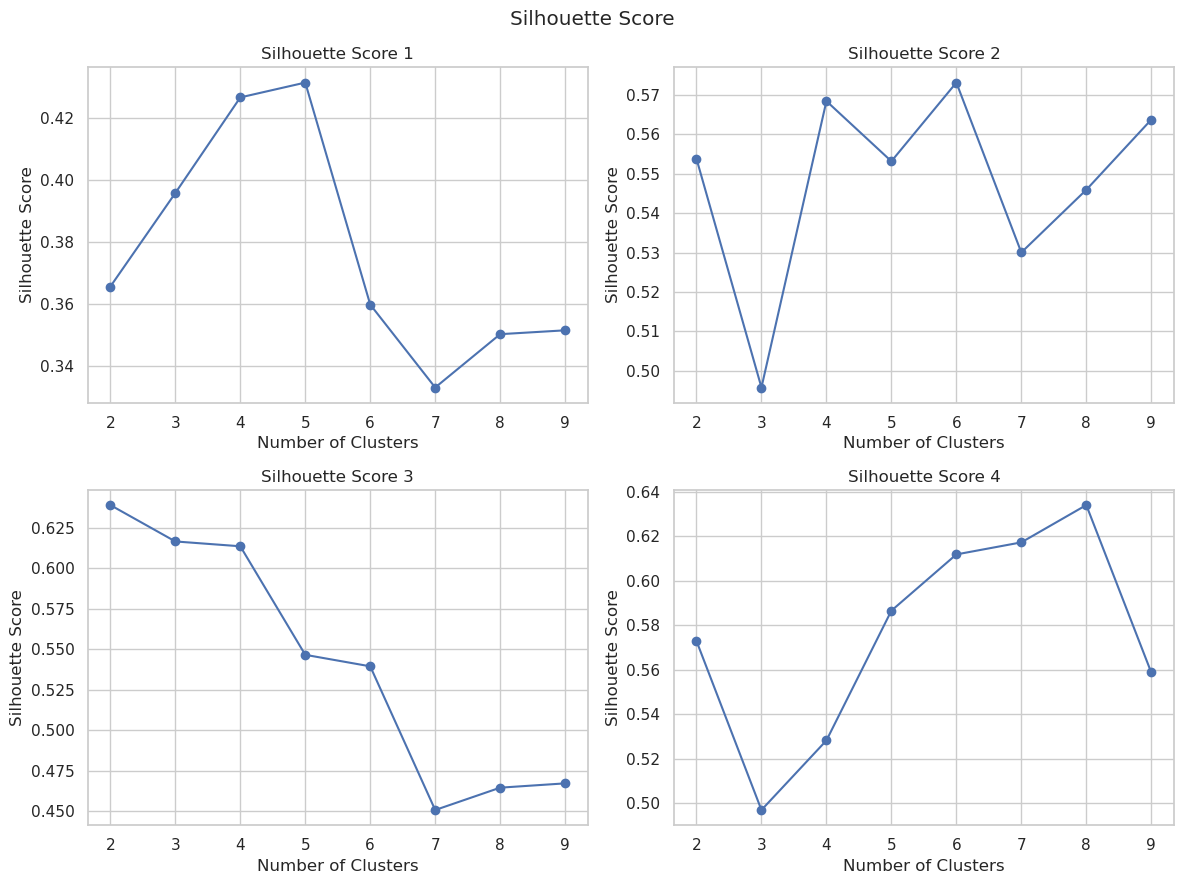

In [320]:
from sklearn.metrics import silhouette_score

# 轮廓系数
silhouette_scores_1 = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_1)
    silhouette_scores_1.append(silhouette_score(features_1, labels))

# 轮廓系数
silhouette_scores_2 = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_2)
    silhouette_scores_2.append(silhouette_score(features_2, labels))

# 轮廓系数
silhouette_scores_3 = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_3)
    silhouette_scores_3.append(silhouette_score(features_3, labels))

# 轮廓系数
silhouette_scores_4 = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_4)
    silhouette_scores_4.append(silhouette_score(features_4, labels))

# 绘制轮廓系数图
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

axes[0, 0].plot(range(2, 10), silhouette_scores_1, marker='o')
axes[0, 0].set_xlabel('Number of Clusters')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].set_title('Silhouette Score 1')

axes[0, 1].plot(range(2, 10), silhouette_scores_2, marker='o')
axes[0, 1].set_xlabel('Number of Clusters')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Score 2')

axes[1, 0].plot(range(2, 10), silhouette_scores_3, marker='o')
axes[1, 0].set_xlabel('Number of Clusters')
axes[1, 0].set_ylabel('Silhouette Score')
axes[1, 0].set_title('Silhouette Score 3')

axes[1, 1].plot(range(2, 10), silhouette_scores_4, marker='o')
axes[1, 1].set_xlabel('Number of Clusters')
axes[1, 1].set_ylabel('Silhouette Score')
axes[1, 1].set_title('Silhouette Score 4')

fig.suptitle('Silhouette Score')

plt.tight_layout()

plt.show()

In [305]:
# 轮廓系数
silhouette_avg = silhouette_score(features_1, df_od_flow_sg_1_sorted_1000['KMEANS_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.43132278451898964


In [281]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(lines_array, labels)
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 62.928383194773794


In [282]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(lines_array, labels)
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 0.6211795056855197


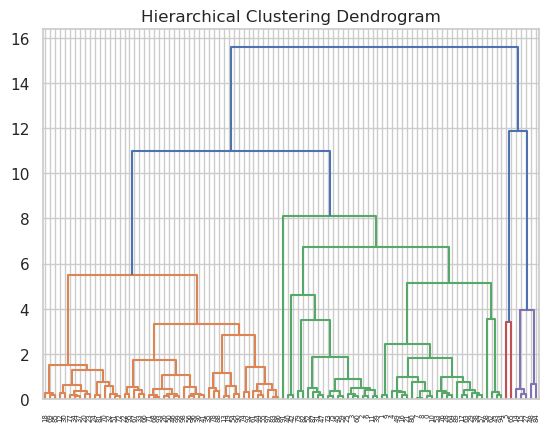

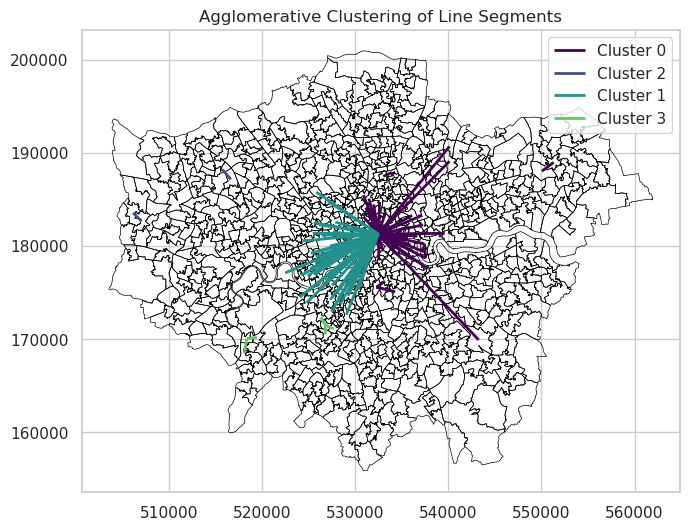

In [294]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# 使用 StandardScaler 进行特征缩放
scaler = StandardScaler()
features = scaler.fit_transform(df_od_flow_sg_1_sorted_1000[['ox', 'oy', 'dx', 'dy']])

# 计算成对样本之间的欧氏距离
distances = pdist(features)

# 计算层次聚类的链接矩阵
linkage_matrix = linkage(distances, method='ward')

# 使用 dendrogram 可视化树状图
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# 使用 AgglomerativeClustering 获取聚类标签
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=10).fit(features)
labels = clustering.labels_

# 将聚类标签添加到 GeoDataFrame
df_od_flow_sg_1_sorted_1000['Agglomerative_cluster'] = labels

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.viridis(i / len(df_od_flow_sg_1_sorted_1000['Agglomerative_cluster'].unique())) for i, label in enumerate(df_od_flow_sg_1_sorted_1000['Agglomerative_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

London_msoa.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)

# 根据簇标签绘制不同颜色的线条
for label in df_od_flow_sg_1_sorted_1000['Agglomerative_cluster'].unique():
    subset = df_od_flow_sg_1_sorted_1000[df_od_flow_sg_1_sorted_1000['Agglomerative_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('Agglomerative Clustering of Line Segments')
plt.show()

In [296]:
from sklearn.metrics import silhouette_score

# 轮廓系数
silhouette_avg = silhouette_score(features, df_od_flow_sg_1_sorted_1000['Agglomerative_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.371282165320898


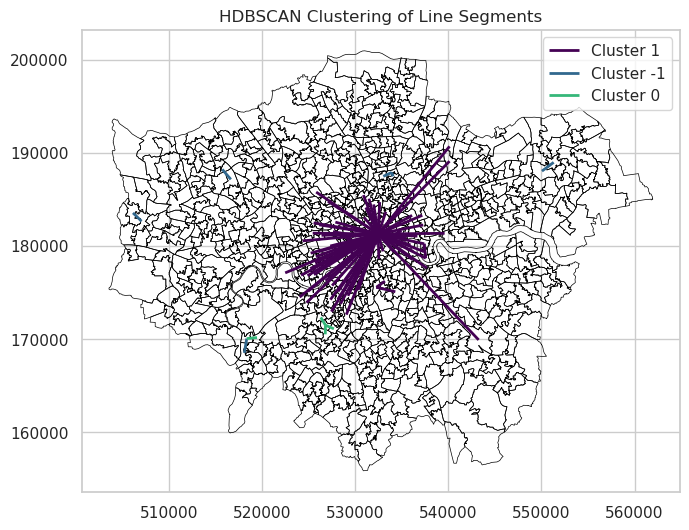

In [290]:
import hdbscan

# 使用 StandardScaler 进行特征缩放
scaler = StandardScaler()
features = scaler.fit_transform(df_od_flow_sg_1_sorted_1000[['ox', 'oy', 'dx', 'dy']])

# 使用 HDBSCAN 进行聚类
clusterer = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=3)
df_od_flow_sg_1_sorted_1000['HDBSCAN_cluster'] = clusterer.fit_predict(features)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.viridis(i / len(df_od_flow_sg_1_sorted_1000['HDBSCAN_cluster'].unique())) for i, label in enumerate(df_od_flow_sg_1_sorted_1000['HDBSCAN_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

London_msoa.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)

# 根据簇标签绘制不同颜色的线条
for label in df_od_flow_sg_1_sorted_1000['HDBSCAN_cluster'].unique():
    subset = df_od_flow_sg_1_sorted_1000[df_od_flow_sg_1_sorted_1000['HDBSCAN_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('HDBSCAN Clustering of Line Segments')
plt.show()

In [291]:
# 轮廓系数
silhouette_avg = silhouette_score(features, df_od_flow_sg_1_sorted_1000['HDBSCAN_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5979413402039331


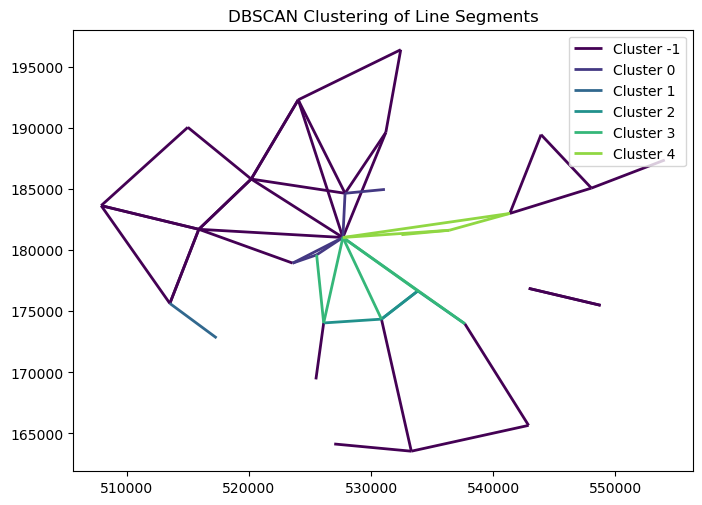

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 使用 StandardScaler 进行特征缩放
scaler = StandardScaler()
features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])

# 使用 DBSCAN 进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=3)
filtered_df['DBSCAN_cluster'] = dbscan.fit_predict(features)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.viridis(i / len(filtered_df['DBSCAN_cluster'].unique())) for i, label in enumerate(filtered_df['DBSCAN_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df['DBSCAN_cluster'].unique():
    subset = filtered_df[filtered_df['DBSCAN_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('DBSCAN Clustering of Line Segments')
plt.show()


In [103]:
# 轮廓系数
silhouette_avg = silhouette_score(features, filtered_df['DBSCAN_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.1616075084191387


In [104]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(features, filtered_df['DBSCAN_cluster'])
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 1.8034022701783696


In [105]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(features, filtered_df['DBSCAN_cluster'])
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 4.551060078580591


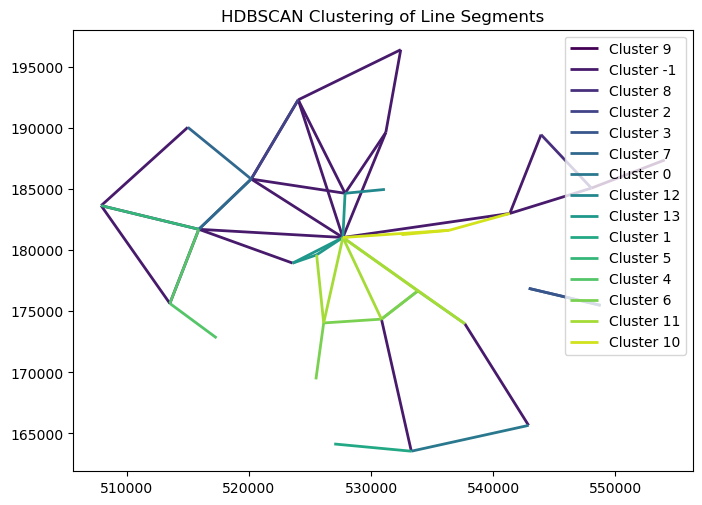

In [107]:
import hdbscan

# 使用 StandardScaler 进行特征缩放
scaler = StandardScaler()
features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])

# 使用 HDBSCAN 进行聚类
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=2)
filtered_df['HDBSCAN_cluster'] = clusterer.fit_predict(features)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.viridis(i / len(filtered_df['HDBSCAN_cluster'].unique())) for i, label in enumerate(filtered_df['HDBSCAN_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df['HDBSCAN_cluster'].unique():
    subset = filtered_df[filtered_df['HDBSCAN_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('HDBSCAN Clustering of Line Segments')
plt.show()

In [108]:
# 轮廓系数
silhouette_avg = silhouette_score(features, filtered_df['HDBSCAN_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.18306007499605406


In [109]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(features, filtered_df['DBSCAN_cluster'])
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 1.8034022701783696


In [110]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(features, filtered_df['DBSCAN_cluster'])
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 4.551060078580591


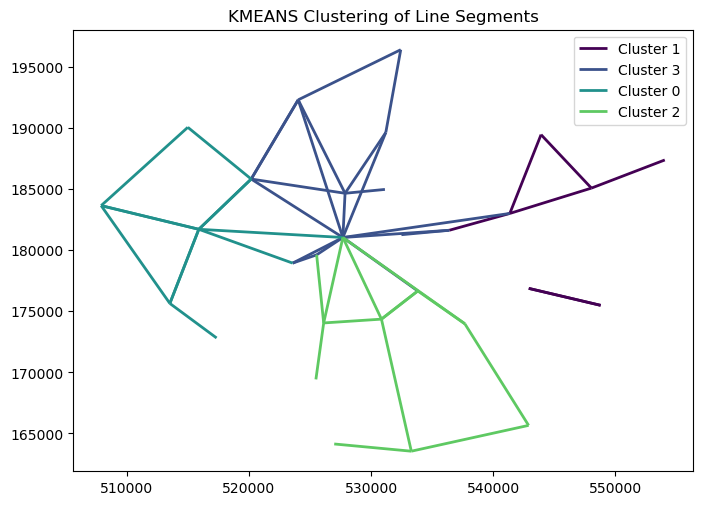

In [67]:
# 使用 StandardScaler 进行特征缩放
# scaler = StandardScaler()
# features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])
features = filtered_df[['ox', 'oy', 'dx', 'dy']]

# 使用 KMEANS 进行聚类
kmeans = KMeans(n_clusters=4, random_state=42)
filtered_df['KMEANS_cluster'] = kmeans.fit_predict(features)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.viridis(i / len(filtered_df['KMEANS_cluster'].unique())) for i, label in enumerate(filtered_df['KMEANS_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df['KMEANS_cluster'].unique():
    subset = filtered_df[filtered_df['KMEANS_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('KMEANS Clustering of Line Segments')
plt.show()

In [68]:
# 轮廓系数
silhouette_avg = silhouette_score(features, filtered_df['KMEANS_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.35164628256099995


In [69]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(features, filtered_df['KMEANS_cluster'])
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 87.15380714130484


In [70]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(features, filtered_df['KMEANS_cluster'])
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 0.8942002315953571


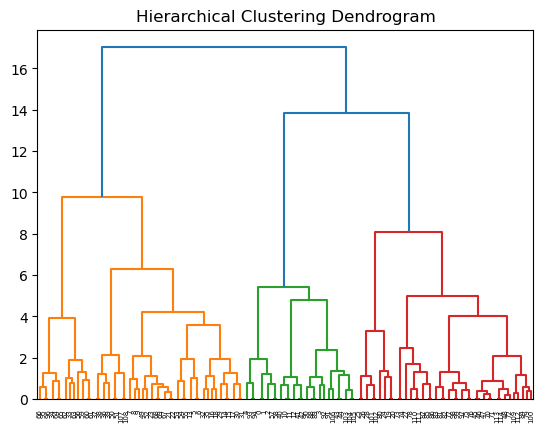

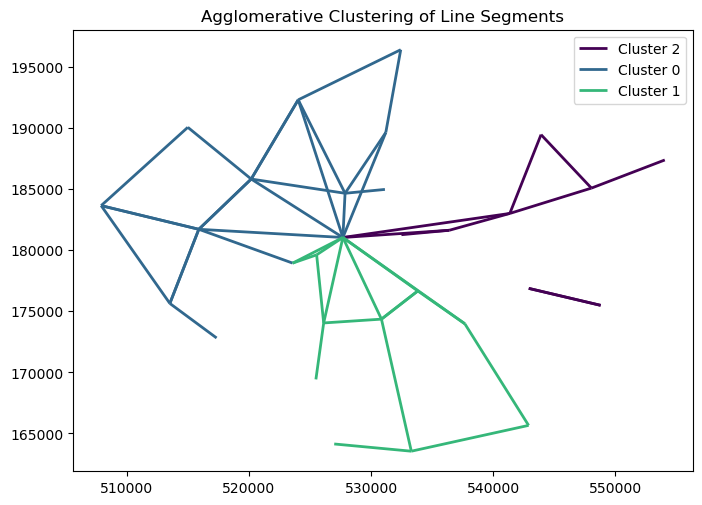

In [71]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# 使用 StandardScaler 进行特征缩放
scaler = StandardScaler()
features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])

# 计算成对样本之间的欧氏距离
distances = pdist(features)

# 计算层次聚类的链接矩阵
linkage_matrix = linkage(distances, method='ward')

# 使用 dendrogram 可视化树状图
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# 使用 AgglomerativeClustering 获取聚类标签
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=10).fit(features)
labels = clustering.labels_

# 将聚类标签添加到 GeoDataFrame
filtered_df['Agglomerative_cluster'] = labels

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.viridis(i / len(filtered_df['Agglomerative_cluster'].unique())) for i, label in enumerate(filtered_df['Agglomerative_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df['Agglomerative_cluster'].unique():
    subset = filtered_df[filtered_df['Agglomerative_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('Agglomerative Clustering of Line Segments')
plt.show()


In [72]:
from sklearn.metrics import silhouette_score

# 轮廓系数
silhouette_avg = silhouette_score(features, filtered_df['Agglomerative_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2964558489878498


In [73]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(features, filtered_df['Agglomerative_cluster'])
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 61.576114515443386


In [74]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(features, filtered_df['Agglomerative_cluster'])
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 1.045058263375471


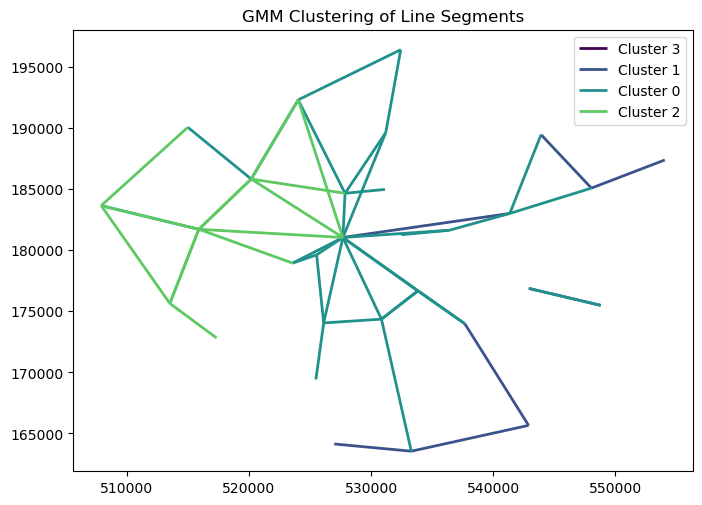

In [75]:
from sklearn.mixture import GaussianMixture

# 使用 StandardScaler 进行特征缩放
# scaler = StandardScaler()
# features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])
features = filtered_df[['ox', 'oy', 'dx', 'dy']]

# 使用 GaussianMixture 进行聚类
gmm = GaussianMixture(n_components=4, random_state=42)
filtered_df['GMM_cluster'] = gmm.fit_predict(features)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.viridis(i / len(filtered_df['GMM_cluster'].unique())) for i, label in enumerate(filtered_df['GMM_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df['GMM_cluster'].unique():
    subset = filtered_df[filtered_df['GMM_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('GMM Clustering of Line Segments')
plt.show()


In [76]:
from sklearn.metrics import silhouette_score

# 轮廓系数
silhouette_avg = silhouette_score(features, filtered_df['GMM_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.0960829087259125


In [77]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(features, filtered_df['GMM_cluster'])
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 6.837675278556376


In [78]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(features, filtered_df['GMM_cluster'])
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 7.410183067794206


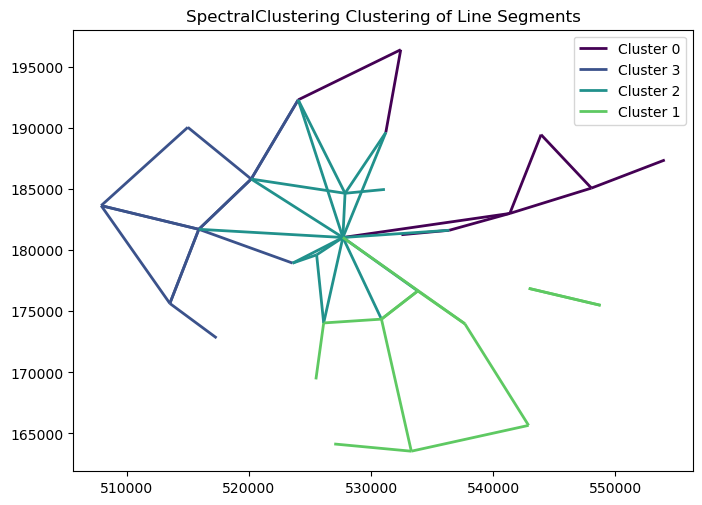

In [79]:
from sklearn.cluster import SpectralClustering

# 使用 StandardScaler 进行特征缩放
scaler = StandardScaler()
features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])

# 使用 SpectralClustering 进行聚类
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
filtered_df['SpectralClustering_cluster'] = spectral.fit_predict(features)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.viridis(i / len(filtered_df['SpectralClustering_cluster'].unique())) for i, label in enumerate(filtered_df['SpectralClustering_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df['SpectralClustering_cluster'].unique():
    subset = filtered_df[filtered_df['SpectralClustering_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('SpectralClustering Clustering of Line Segments')
plt.show()


In [80]:
from sklearn.metrics import silhouette_score

# 轮廓系数
silhouette_avg = silhouette_score(features, filtered_df['SpectralClustering_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.24814949453825613


In [81]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(features, filtered_df['SpectralClustering_cluster'])
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 61.7206169220087


In [82]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(features, filtered_df['SpectralClustering_cluster'])
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 1.1190173513341535


In [83]:
pip install traclus-python==1.0.1

  Preparing metadata (setup.py) ... done
  Created wheel for traclus-python: filename=traclus_python-1.0.1-py3-none-any.whl size=12969 sha256=077472bceabd2a0dbfa373b1196a5e9cbc0a8c3f7d093d1fc7fe0d5756b0167b
  Stored in directory: /home/jovyan/.cache/pip/wheels/26/df/f0/6fd28f31d379dc41c21d8077c1f7d23b83f4445840d590a873
Successfully built traclus-python
Note: you may need to restart the kernel to use updated packages.


In [84]:
scaler = StandardScaler()
features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])
df_result = pd.DataFrame(features, columns=['ox', 'oy', 'dx', 'dy'])

In [85]:
# 定义一个函数将每一行的数据转换为所需的格式
def row_to_array(row):
    return np.array([[row['ox'], row['oy']], [row['dx'], row['dy']]])

# 使用 apply 方法将每一行的数据应用到函数，并将结果放入一个列表中
result_list = df_result.apply(row_to_array, axis=1).tolist()

In [135]:
from traclus import traclus as tr

trajectories = result_list

partitions, segments, dist_matrix, clusters, cluster_assignments, representative_trajectories = tr.traclus(trajectories, d_weights = [1, 1, 1], max_eps=5, min_samples=3, directional=False)

cluster_assignments

array([ 0,  0,  0, -1, -1,  1,  1,  1, -1, -1,  2,  2,  2,  1,  3,  3, -1,
        3, -1, -1, -1,  4,  4,  4, -1, -1, -1, -1, -1,  3,  7,  7, -1, -1,
        7, -1, -1, -1, -1,  6,  2,  2,  2,  4,  4,  5,  5, -1, -1, -1,  6,
        6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  7, -1, -1, -1,  8, -1,
        4,  4,  5,  5, -1, -1, -1, -1, -1, -1, -1,  9, -1, 10, 10, 10, -1,
       -1, -1,  9, -1, -1, -1, 11, -1, -1, -1,  8,  8, -1, 10, 10, -1, -1,
       -1, 11, 11, 11, 11, -1, -1,  9,  9,  9,  9, -1, -1])

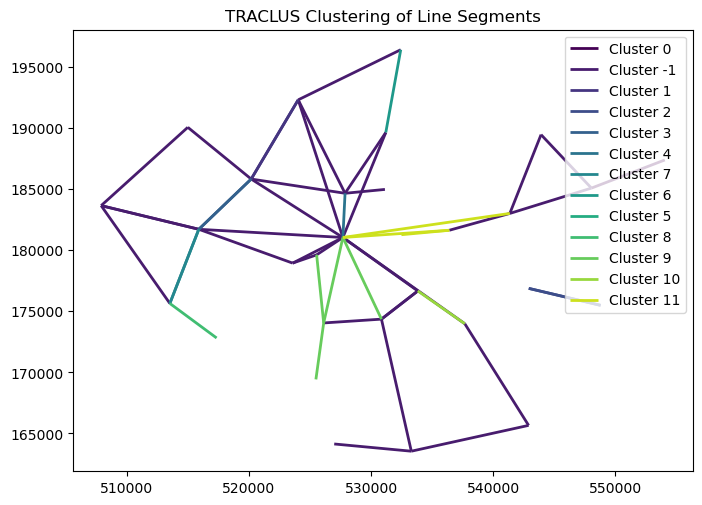

In [136]:
cluster_series = pd.Series(cluster_assignments, name='TRACLUS_cluster')
filtered_df_test = pd.concat([filtered_df, cluster_series], axis=1)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.viridis(i / len(filtered_df_test['TRACLUS_cluster'].unique())) for i, label in enumerate(filtered_df_test['TRACLUS_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df_test['TRACLUS_cluster'].unique():
    subset = filtered_df_test[filtered_df_test['TRACLUS_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('TRACLUS Clustering of Line Segments')
plt.show()

In [137]:
from sklearn.metrics import silhouette_score

# 轮廓系数
silhouette_avg = silhouette_score(df_result, filtered_df_test['TRACLUS_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.11174281074067179
